# Sweet 🧈 Butter

Sweet Butter is a shortest paths problem:

> Farmer John (FJ) has cow pastures all connected by paths. His cows are content grazing spread about these pastures. FJ loves his cows and treats them sugar cubes! He places sugar cubes in one pasture, rings a bell, and cows moo-ve to the sugar cube pasture. Cows are keen on sugar and always take the shortest path. We will write a program to efficiently find which pasture FJ should put the sugar to minimize the total distance traveled by his cows.

Rephrased:

> Given a connected undirected weighted graph with some active nodes, find the node that minimizes the total distance taken from every active node to it.

# Vocabulary
The key concepts for this problem:
- **Node**: pasture.
- **Weighted Edge**: length of direct connection between two pastures. 
- **Undirected**: edges can can be traversed in both directions.
- **Shortest Path**: minimal sum of edge weights to get from pasture A to pasture B. (Other problems may want this as number of edges or sequence of nodes taken.)
- **Adjacency List**: a data structure to represent a [graph](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29). Each node *a* in the graph is assigned an [adjacency list](https://en.wikipedia.org/wiki/Adjacency_list) that consists of nodes to where there is an edge from *a*.
- **Dijkstra's Algorithm**: an algorithm for finding the shortest paths from a starting node to all other nodes. 

Related concepts are:
- **Adjacency Matrix**: a data structure to represent a graph.
- **Floyd-Warshall Algorithm**: a shortest paths algorithm.

# Imports, Types, and Utility Functions

In [55]:
import matplotlib.pyplot as plt
import networkx          as nx
from typing      import *
from collections import defaultdict

In [54]:
Cow = Dict[int, int]               # A cow and its pasture
Edge = Tuple[int, int]             # A pasture and connection length
Adj = DefaultDict[int, List[Edge]] # Adjacency list, e.g. {1: [(2, 1), (3, 5)], 2: [(1, 1), (3, 7), (4, 3)], ...}
Data = Tuple[Cow, Adj]             # Data read from input

In [50]:
def read_input(file: str='butter.in') -> Data:
    cow, adj = {}, defaultdict(list)
    with open(file) as f:
        C, V, E = map(int, f.readline().split())     # cows, vertices (nodes), edges
        for i in range(1, C + 1):
            cow[i] = int(f.readline())
        for _ in range(E):
            u, v, w = map(int, f.readline().split()) # undirected edge connecting u and v with weight w
            adj[u].append((v, w))
            adj[v].append((u, w))
    return cow, adj

# Input
Here is the sample input. Tougher inputs will be tested.

The first line contains the number of cows, pastures, and edges respectively. The next cow number of lines is each cow and their pasture. Followed by edge number of lines containing connected pastures and the distance between them. 

>3 4 5\
2\
3\
4\
1 2 1\
1 3 5\
2 3 7\
2 4 3\
3 4 5

Cows and their pasture are stored in a dictionary and an adjacency list stores the graph of pastures and connections.

In [52]:
read_input() 

({1: 2, 2: 3, 3: 4},
 defaultdict(list,
             {1: [(2, 1), (3, 5)],
              2: [(1, 1), (3, 7), (4, 3)],
              3: [(1, 5), (2, 7), (4, 5)],
              4: [(2, 3), (3, 5)]}))

*Note: Cow 1 is grazing in node 2. Node 4 of the adjacency list has two connections: node 2 weighted 3 and node 3 weighted 5.*

# Adjacency List

It can be helpful to visualize the graph.

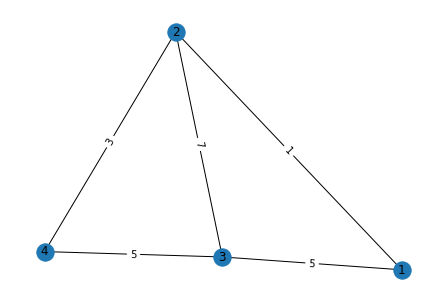

In [97]:
cow, adj = read_input()
G = nx.Graph()
for u in adj:
    for edge in adj[u]:
        v, w = edge[0], edge[1]
        G.add_edge(u, v, weight=w)
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

#todo add custom cow nodes 🐄